In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import pandas as pd
import pickle
#import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [3]:
save_dir='model_storage/'
compare = ['MLP', 'GCN', 'GAT', 'SAGE', 'HeteroGNN', 'HGT']

In [4]:
rand = pd.read_csv(save_dir+'Random/val_metrics.csv', sep='\t', index_col='Unnamed: 0')
rand['VAL_k_jac'] = rand['VAL_k_jac']*100
rand

,ATT_loss,VAL_loss,ATT_acc,VAL_k_acc,VAL_k_jac,VAL_1_acc
0,2.202157,2.321530,17.479675,58.128079,21.223318,24.137931
1,2.215696,2.316698,15.650407,59.605911,23.850575,18.719212
2,2.207688,2.320378,16.869919,58.620690,20.525452,16.256158
42,2.197887,2.317570,17.886179,60.098522,23.399016,23.152709
100,2.198714,2.320824,17.479675,58.128079,21.962234,19.704433
233,2.182323,2.321458,19.715447,55.665025,21.305419,19.211823
1024,2.196054,2.319687,18.089431,53.694581,21.921183,14.778325
1337,2.223071,2.326894,14.430894,53.694581,20.320198,18.226601
2333,2.200048,2.315002,17.479675,58.128079,23.275863,19.704433
4399,2.178300,2.326259,20.528455,55.665025,21.444993,13.793103


In [5]:
mask = {}
choice = ['vis', 'tex']
for c in choice:
    mask[c] = {}
    for model in compare:
        now_dir = save_dir + model + '/'
        temp_df = pd.read_csv(now_dir + c + '_masked_val_metrics.csv', sep='\t', index_col=0)
        temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
        mask[c][model] = ((np.array(temp_df)).mean(axis=0).round(2),(np.array(temp_df)).std(axis=0).round(4))

In [6]:
metrics = {}
for model in compare:
    now_dir = save_dir + model + '/'
    metrics[model] = {}
    if model == 'GCN':
        temp_df = pd.read_csv(now_dir+'knn_val_metrics.csv', sep='\t', index_col='Unnamed: 0')
    else:
        temp_df = pd.read_csv(now_dir+'val_metrics.csv', sep='\t', index_col='Unnamed: 0')
    temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
    metrics[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))

In [7]:
metrics_o = {}
for model in compare:
    now_dir = save_dir + model + '/'
    metrics_o[model] = {}
    temp_df = pd.read_csv(now_dir+'val_metrics.csv', sep='\t', index_col='Unnamed: 0')
    temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
    metrics_o[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))

In [8]:
metrics_k = {}
for model in compare:
    now_dir = save_dir + model + '/'
    metrics_k[model] = {}
    try:
        temp_df = pd.read_csv(now_dir+'knn_val_metrics.csv', sep='\t', index_col='Unnamed: 0')
        temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
        metrics_k[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))
    except:
        continue

In [9]:
SOC = {}
for model in compare:
    now_dir = save_dir + model + '/'
    SOC[model] = {}
    try:
        temp_df = pd.read_csv(now_dir+'SOC_val_metrics_transfer.csv', sep='\t', index_col='Unnamed: 0')
        temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
        SOC[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))
    except:
        continue

In [10]:
SPA = {}
for model in compare:
    now_dir = save_dir + model + '/'
    SPA[model] = {}
    try:
        temp_df = pd.read_csv(now_dir+'SPA_val_metrics_transfer.csv', sep='\t', index_col='Unnamed: 0')
        temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
        SPA[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))
    except:
        continue

In [11]:
TEM = {}
for model in compare:
    now_dir = save_dir + model + '/'
    TEM[model] = {}
    try:
        temp_df = pd.read_csv(now_dir+'TEM_val_metrics_transfer.csv', sep='\t', index_col='Unnamed: 0')
        temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
        TEM[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))
    except:
        continue

In [12]:
nSOC = {}
for model in compare:
    now_dir = save_dir + model + '/'
    nSOC[model] = {}
    try:
        temp_df = pd.read_csv(now_dir+'NO_SOC_val_metrics_transfer.csv', sep='\t', index_col='Unnamed: 0')
        temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
        nSOC[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))
    except:
        continue

In [13]:
nSPA = {}
for model in compare:
    now_dir = save_dir + model + '/'
    nSPA[model] = {}
    try:
        temp_df = pd.read_csv(now_dir+'NO_SPA_val_metrics_transfer.csv', sep='\t', index_col='Unnamed: 0')
        temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
        nSPA[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))
    except:
        continue

In [14]:
nTEM = {}
for model in compare:
    now_dir = save_dir + model + '/'
    nTEM[model] = {}
    try:
        temp_df = pd.read_csv(now_dir+'NO_TEM_val_metrics_transfer.csv', sep='\t', index_col='Unnamed: 0')
        temp_df['VAL_k_jac'] = temp_df['VAL_k_jac']*100
        nTEM[model] = (((np.array(temp_df)).mean(axis=0).round(2)), 
                         ((np.array(temp_df)).std(axis=0).round(2)))
    except:
        continue

In [15]:
mask

{'vis': {'MLP': (array([ 2.23,  1.65, 14.23, 99.51, 75.45, 80.79]),
   array([0., 0., 0., 0., 0., 0.])),
  'GCN': (array([ 1.02,  1.64, 87.6 , 99.01, 73.4 , 77.34]),
   array([0., 0., 0., 0., 0., 0.])),
  'GAT': (array([ 2.07,  1.63, 20.75, 99.51, 76.15, 79.85]),
   array([6.000e-04, 1.000e-04, 5.178e-01, 0.000e+00, 3.602e-01, 1.478e-01])),
  'SAGE': (array([  2.27,   1.63,  22.34, 100.  ,  77.79,  79.26]),
   array([1.700e-03, 2.000e-04, 2.122e-01, 0.000e+00, 4.777e-01, 4.092e-01])),
  'HeteroGNN': (array([ 2.15,  1.68, 15.18, 96.4 , 65.76, 69.11]),
   array([2.600e-03, 6.000e-04, 4.070e-01, 3.847e-01, 6.459e-01, 5.849e-01])),
  'HGT': (array([ 2.15,  1.67, 17.28, 99.01, 70.69, 77.34]),
   array([0., 0., 0., 0., 0., 0.]))},
 'tex': {'MLP': (array([ 0.79,  2.05, 99.19, 60.1 ,  1.23, 23.15]),
   array([0., 0., 0., 0., 0., 0.])),
  'GCN': (array([ 0.85,  1.81, 91.46, 67.49,  8.46, 22.66]),
   array([0., 0., 0., 0., 0., 0.])),
  'GAT': (array([ 0.81,  1.95, 98.56, 70.34,  0.25, 22.66]),
 

In [16]:
metrics_o

{'MLP': (array([ 0.79,  1.63, 98.98, 99.51, 75.78, 80.79]),
  array([0., 0., 0., 0., 0., 0.])),
 'GCN': (array([ 1.39,  1.67, 67.58, 97.78, 65.52, 73.65]),
  array([0.01, 0.  , 0.62, 0.59, 1.06, 1.02])),
 'GAT': (array([ 0.8 ,  1.62, 98.07, 99.51, 76.32, 80.39]),
  array([0.  , 0.  , 0.1 , 0.  , 0.21, 0.43])),
 'SAGE': (array([ 0.79,  1.63, 95.71, 99.95, 77.17, 80.69]),
  array([0.  , 0.  , 0.21, 0.15, 0.38, 0.72])),
 'HeteroGNN': (array([ 0.81,  1.62, 96.63, 99.11, 77.33, 84.73]),
  array([0.  , 0.  , 0.24, 0.2 , 0.6 , 1.14])),
 'HGT': (array([ 0.84,  1.63, 96.95, 98.03, 73.81, 79.31]),
  array([0., 0., 0., 0., 0., 0.]))}

In [17]:
metrics_k

{'MLP': {},
 'GCN': (array([ 0.85,  1.64, 91.87, 99.51, 69.21, 74.38]),
  array([0., 0., 0., 0., 0., 0.])),
 'GAT': (array([ 0.82,  1.62, 97.15, 99.51, 74.79, 80.3 ]),
  array([0., 0., 0., 0., 0., 0.])),
 'SAGE': (array([  0.84,   1.65,  91.46, 100.  ,  74.22,  77.34]),
  array([0., 0., 0., 0., 0., 0.])),
 'HeteroGNN': {},
 'HGT': {}}

In [18]:
SOC

{'MLP': {},
 'GCN': (array([ 4.01,  2.32, 45.37, 71.43, 37.15, 46.01]),
  array([0.01, 0.02, 0.64, 1.28, 0.68, 1.06])),
 'GAT': (array([ 0.8 ,  1.63, 97.97, 99.01, 76.26, 79.95]),
  array([0.  , 0.  , 0.  , 0.  , 0.29, 0.23])),
 'SAGE': (array([ 0.81,  1.63, 94.9 , 98.52, 76.06, 79.26]),
  array([0.  , 0.  , 0.17, 0.  , 0.36, 0.46])),
 'HeteroGNN': (array([ 1.46,  1.69, 62.34, 95.67, 66.72, 71.77]),
  array([0.  , 0.  , 0.26, 0.37, 0.33, 0.38])),
 'HGT': (array([ 0.84,  1.63, 96.95, 98.03, 73.48, 79.8 ]),
  array([0., 0., 0., 0., 0., 0.]))}

In [19]:
o_mean = np.vstack(pd.DataFrame(metrics).iloc[0].apply(lambda x: np.array(x[2:]))).T
o_mean

array([[98.98, 91.87, 98.07, 95.71, 96.63, 96.95],
       [99.51, 99.51, 99.51, 99.95, 99.11, 98.03],
       [75.78, 69.21, 76.32, 77.17, 77.33, 73.81],
       [80.79, 74.38, 80.39, 80.69, 84.73, 79.31]])

In [20]:
o_std = np.vstack(pd.DataFrame(metrics).iloc[1].apply(lambda x: x[2:])).T
o_std

array([[0.  , 0.  , 0.1 , 0.21, 0.24, 0.  ],
       [0.  , 0.  , 0.  , 0.15, 0.2 , 0.  ],
       [0.  , 0.  , 0.21, 0.38, 0.6 , 0.  ],
       [0.  , 0.  , 0.43, 0.72, 1.14, 0.  ]])

In [21]:
v_mean = np.vstack(pd.DataFrame(mask['vis']).iloc[0].apply(lambda x: x[2:])).T
v_mean

array([[ 14.23,  87.6 ,  20.75,  22.34,  15.18,  17.28],
       [ 99.51,  99.01,  99.51, 100.  ,  96.4 ,  99.01],
       [ 75.45,  73.4 ,  76.15,  77.79,  65.76,  70.69],
       [ 80.79,  77.34,  79.85,  79.26,  69.11,  77.34]])

In [22]:
v_std = np.vstack(pd.DataFrame(mask['vis']).iloc[1].apply(lambda x: x[2:])).T
v_std

array([[0.    , 0.    , 0.5178, 0.2122, 0.407 , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.3847, 0.    ],
       [0.    , 0.    , 0.3602, 0.4777, 0.6459, 0.    ],
       [0.    , 0.    , 0.1478, 0.4092, 0.5849, 0.    ]])

In [23]:
t_mean = np.vstack(pd.DataFrame(mask['tex']).iloc[0].apply(lambda x: x[2:])).T
t_mean

array([[99.19, 91.46, 98.56, 96.08, 96.1 , 96.75],
       [60.1 , 67.49, 70.34, 70.3 , 67.09, 59.61],
       [ 1.23,  8.46,  0.25,  7.71,  9.31,  4.43],
       [23.15, 22.66, 22.66, 19.7 , 17.64, 21.67]])

In [24]:
t_std = np.vstack(pd.DataFrame(mask['tex']).iloc[1].apply(lambda x: x[2:])).T
t_std

array([[0.    , 0.    , 0.1095, 0.2413, 0.2189, 0.    ],
       [0.    , 0.    , 0.5745, 0.5849, 0.9295, 0.    ],
       [0.    , 0.    , 0.    , 0.3876, 0.4092, 0.    ],
       [0.    , 0.    , 0.4406, 0.9347, 0.6535, 0.    ]])

In [25]:
rand_v = np.array(rand)[:,2:].mean(axis=0)
rand_v

array([17.56097561, 57.14285714, 21.92282502, 18.76847291])

In [26]:
model_names = ['MLP', 'GCN-kNN', 'GAT', 'GSA', 'HGSA', 'HGT']
metric_names = ['HA Top-1 Accuracy', 'OUV Top-3 Accuracy', 'OUV Order-3 Jaccard Index', 'OUV Top-1 Accuracy']

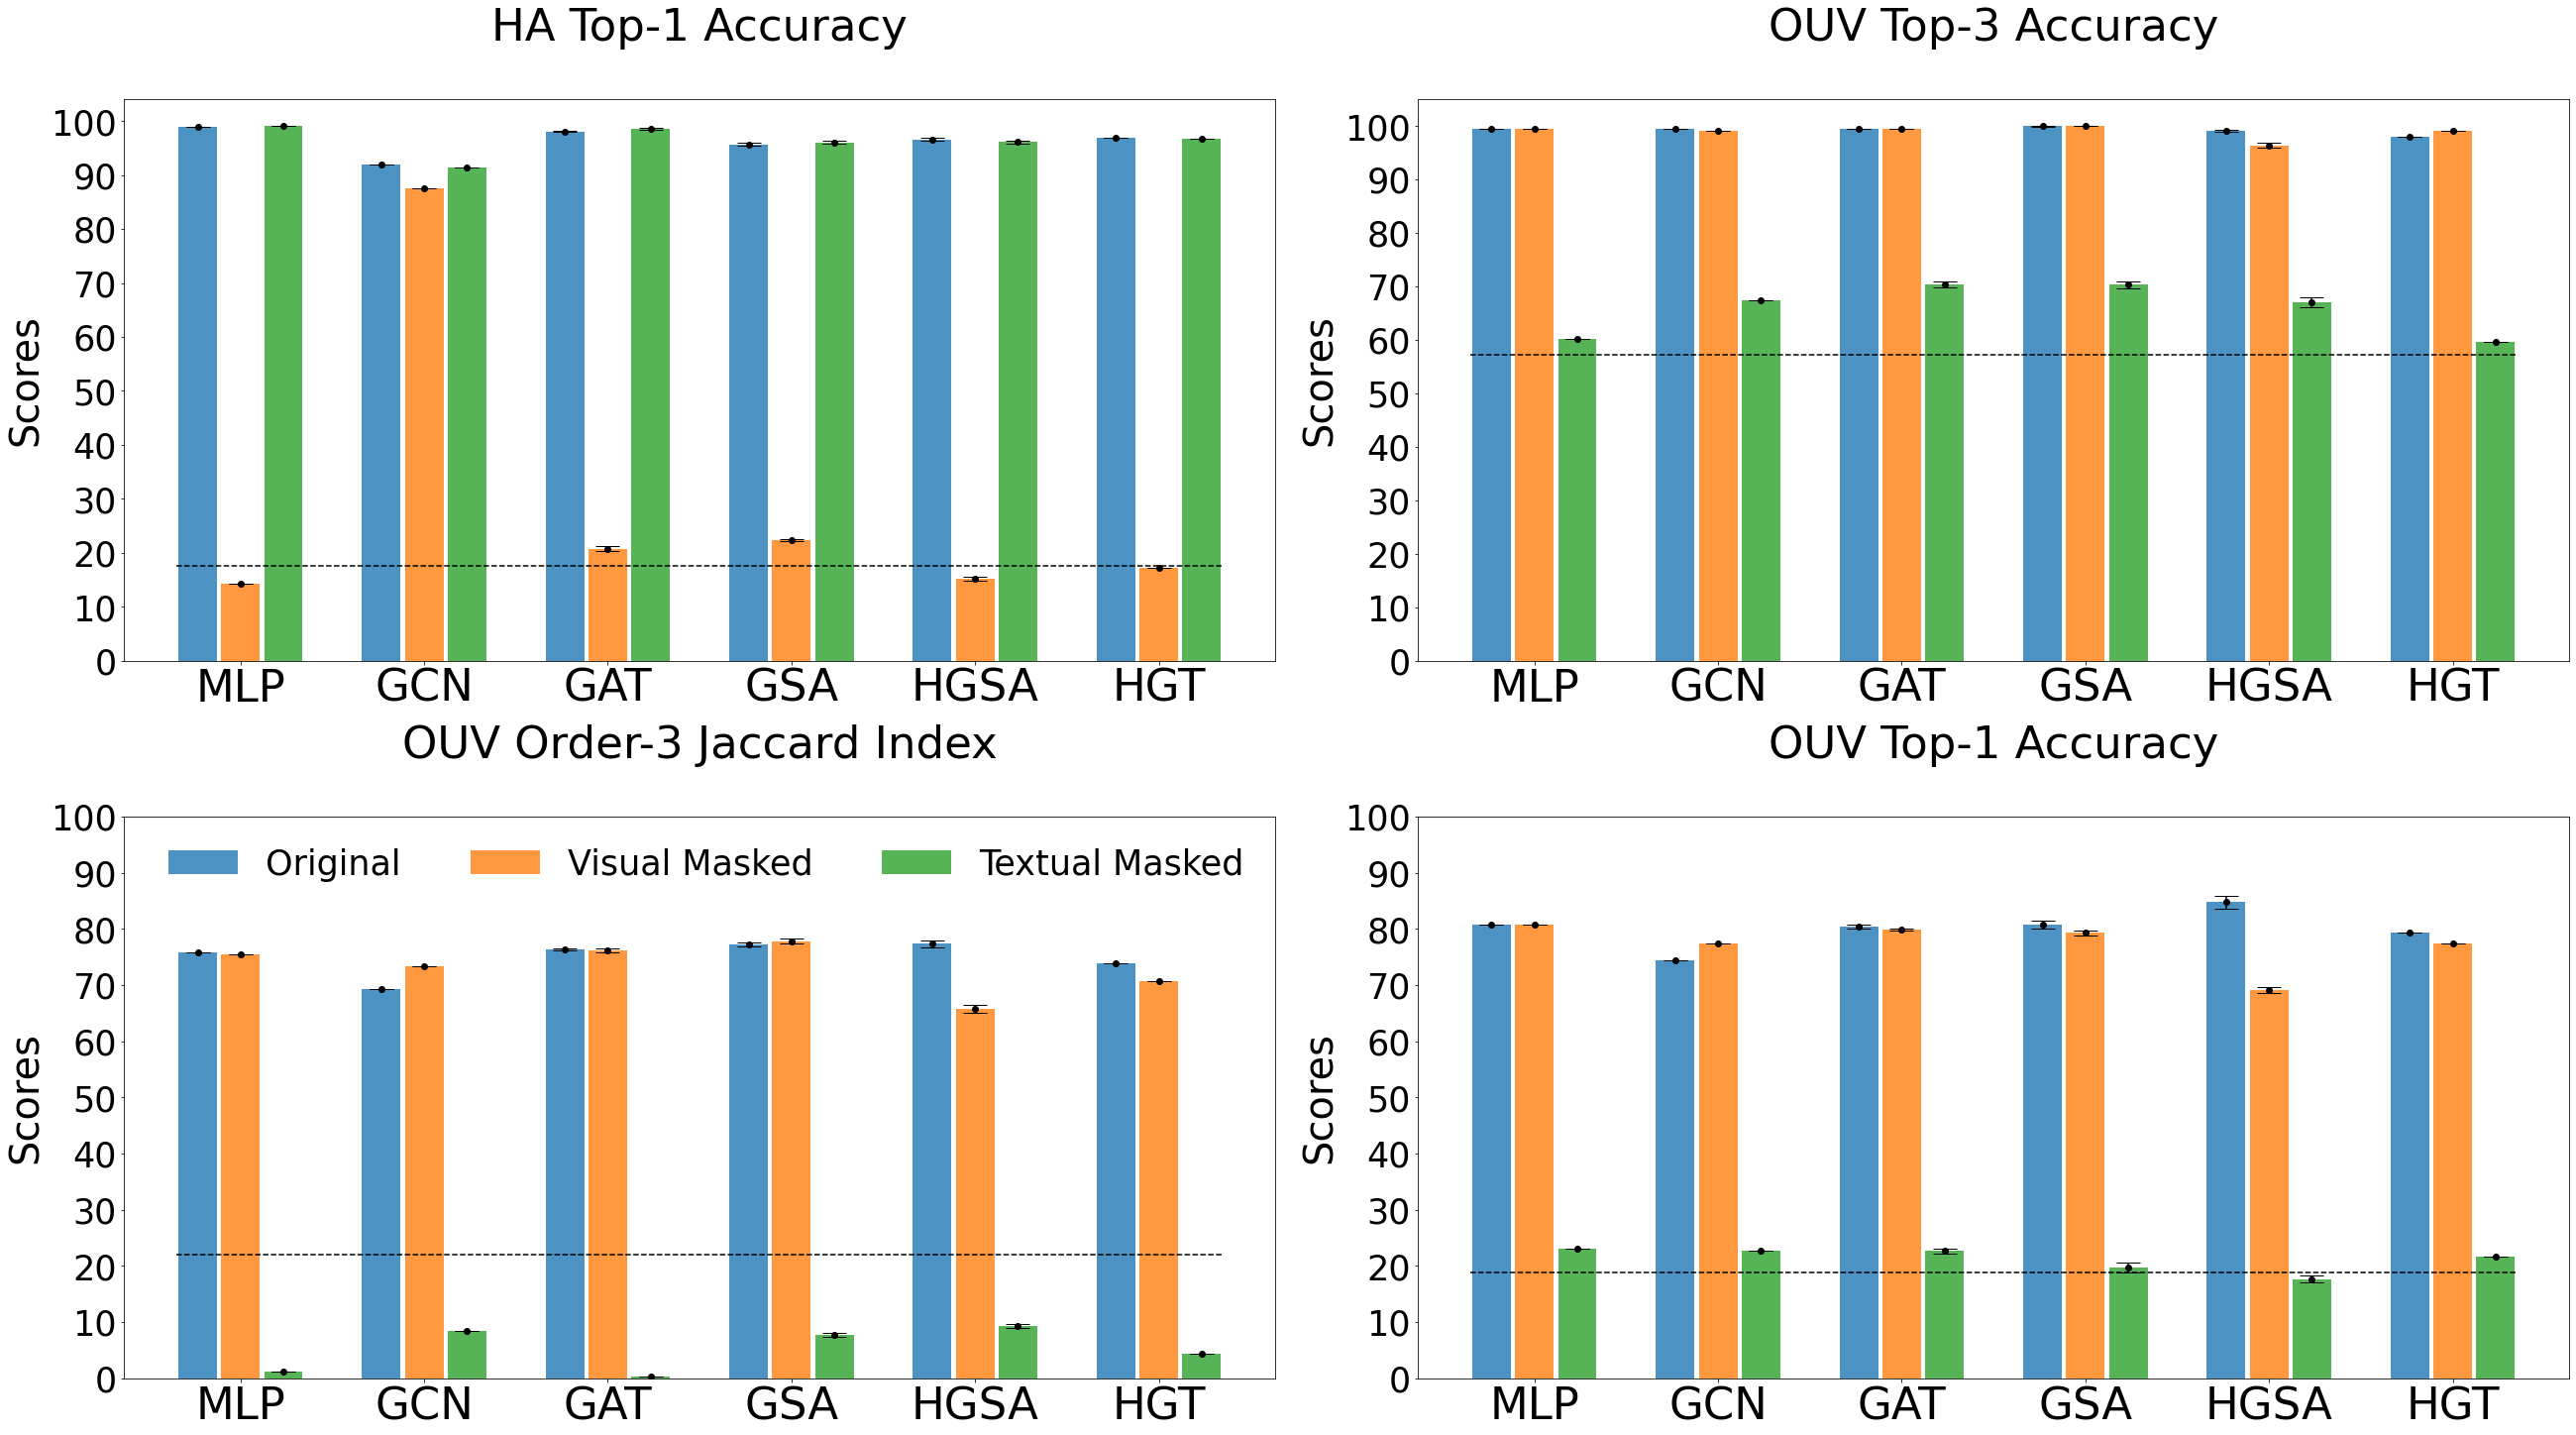

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (36,20), constrained_layout=True,
                       sharex=False, sharey=False)
for j in range(len(metric_names)):
    metric_name = metric_names[j]
    x = np.arange(len(compare))
    width = 0.35
    rects1 = axs[int(j/2), j%2].bar(x - width*2/3, o_mean[j], width*3/5, label='Original',alpha=0.8)
    axs[int(j/2), j%2].errorbar(x - width*2/3, o_mean[j], yerr=o_std[j],fmt='o', capsize=12, color='k')
    rects2 = axs[int(j/2), j%2].bar(x, v_mean[j], width*3/5, label='Visual Masked',alpha=0.8)
    axs[int(j/2), j%2].errorbar(x, v_mean[j], yerr=v_std[j],fmt='o', capsize=12, color='k')
    rects3 = axs[int(j/2), j%2].bar(x + width*2/3, t_mean[j], width*3/5, label='Textual Masked',alpha=0.8)
    axs[int(j/2), j%2].errorbar(x + width*2/3, t_mean[j], yerr=t_std[j],fmt='o', capsize=12, color='k')
    
    axs[int(j/2), j%2].hlines(rand_v[j],- width ,len(compare)-1+ width, color='k',linestyles='dashed')
        
    axs[int(j/2), j%2].set_yticks(np.arange(0,101, 10), fontsize=35)
    axs[int(j/2), j%2].set_yticklabels(np.arange(0,101, 10), fontsize=35)
    axs[int(j/2), j%2].set_ylabel('Scores',size=40)
    
    axs[int(j/2), j%2].set_xticks(x, model_names, size=45)
    axs[int(j/2), j%2].set_title(metric_name+'\n', size=45)
    
    
    if j==2:
        axs[int(j/2), j%2].legend(fontsize=35,frameon=False, ncol=3)

In [35]:
dics = [metrics_o, metrics_k, SOC, SPA, TEM]
dic_names = ['Original', 'kNN Links', 'SOC Links', 'SPA Links', 'TEM Links']

In [36]:
comp = {}
for model in compare[1:4]:
    comp[model] = {}
    for d in range(len(dics)):
        comp[model][dic_names[d]] = dics[d][model][0][2:]

In [37]:
comp_n = {}
for i in dic_names:
    comp_n[i] = np.vstack((pd.DataFrame(comp).loc[i])).T

In [38]:
comp

{'GCN': {'Original': array([67.58, 97.78, 65.52, 73.65]),
  'kNN Links': array([91.87, 99.51, 69.21, 74.38]),
  'SOC Links': array([45.37, 71.43, 37.15, 46.01]),
  'SPA Links': array([49.15, 90.39, 45.1 , 57.83]),
  'TEM Links': array([41.52, 70.59, 27.25, 35.27])},
 'GAT': {'Original': array([98.07, 99.51, 76.32, 80.39]),
  'kNN Links': array([97.15, 99.51, 74.79, 80.3 ]),
  'SOC Links': array([97.97, 99.01, 76.26, 79.95]),
  'SPA Links': array([97.95, 99.51, 74.45, 81.08]),
  'TEM Links': array([97.97, 99.51, 75.27, 79.8 ])},
 'SAGE': {'Original': array([95.71, 99.95, 77.17, 80.69]),
  'kNN Links': array([ 91.46, 100.  ,  74.22,  77.34]),
  'SOC Links': array([94.9 , 98.52, 76.06, 79.26]),
  'SPA Links': array([95.49, 99.51, 73.17, 78.28]),
  'TEM Links': array([95.02, 99.01, 74.98, 79.06])}}

In [39]:
comp_n['Original'][0]

array([67.58, 98.07, 95.71])

In [40]:
model_names = ['MLP', 'GCN', 'GAT', 'GSA', 'HGSA', 'HGT']

In [41]:
abs((comp_n['kNN Links'][j]-comp_n['Original'][j])/comp_n['Original'][j])

array([0.00991174, 0.00111954, 0.04151692])

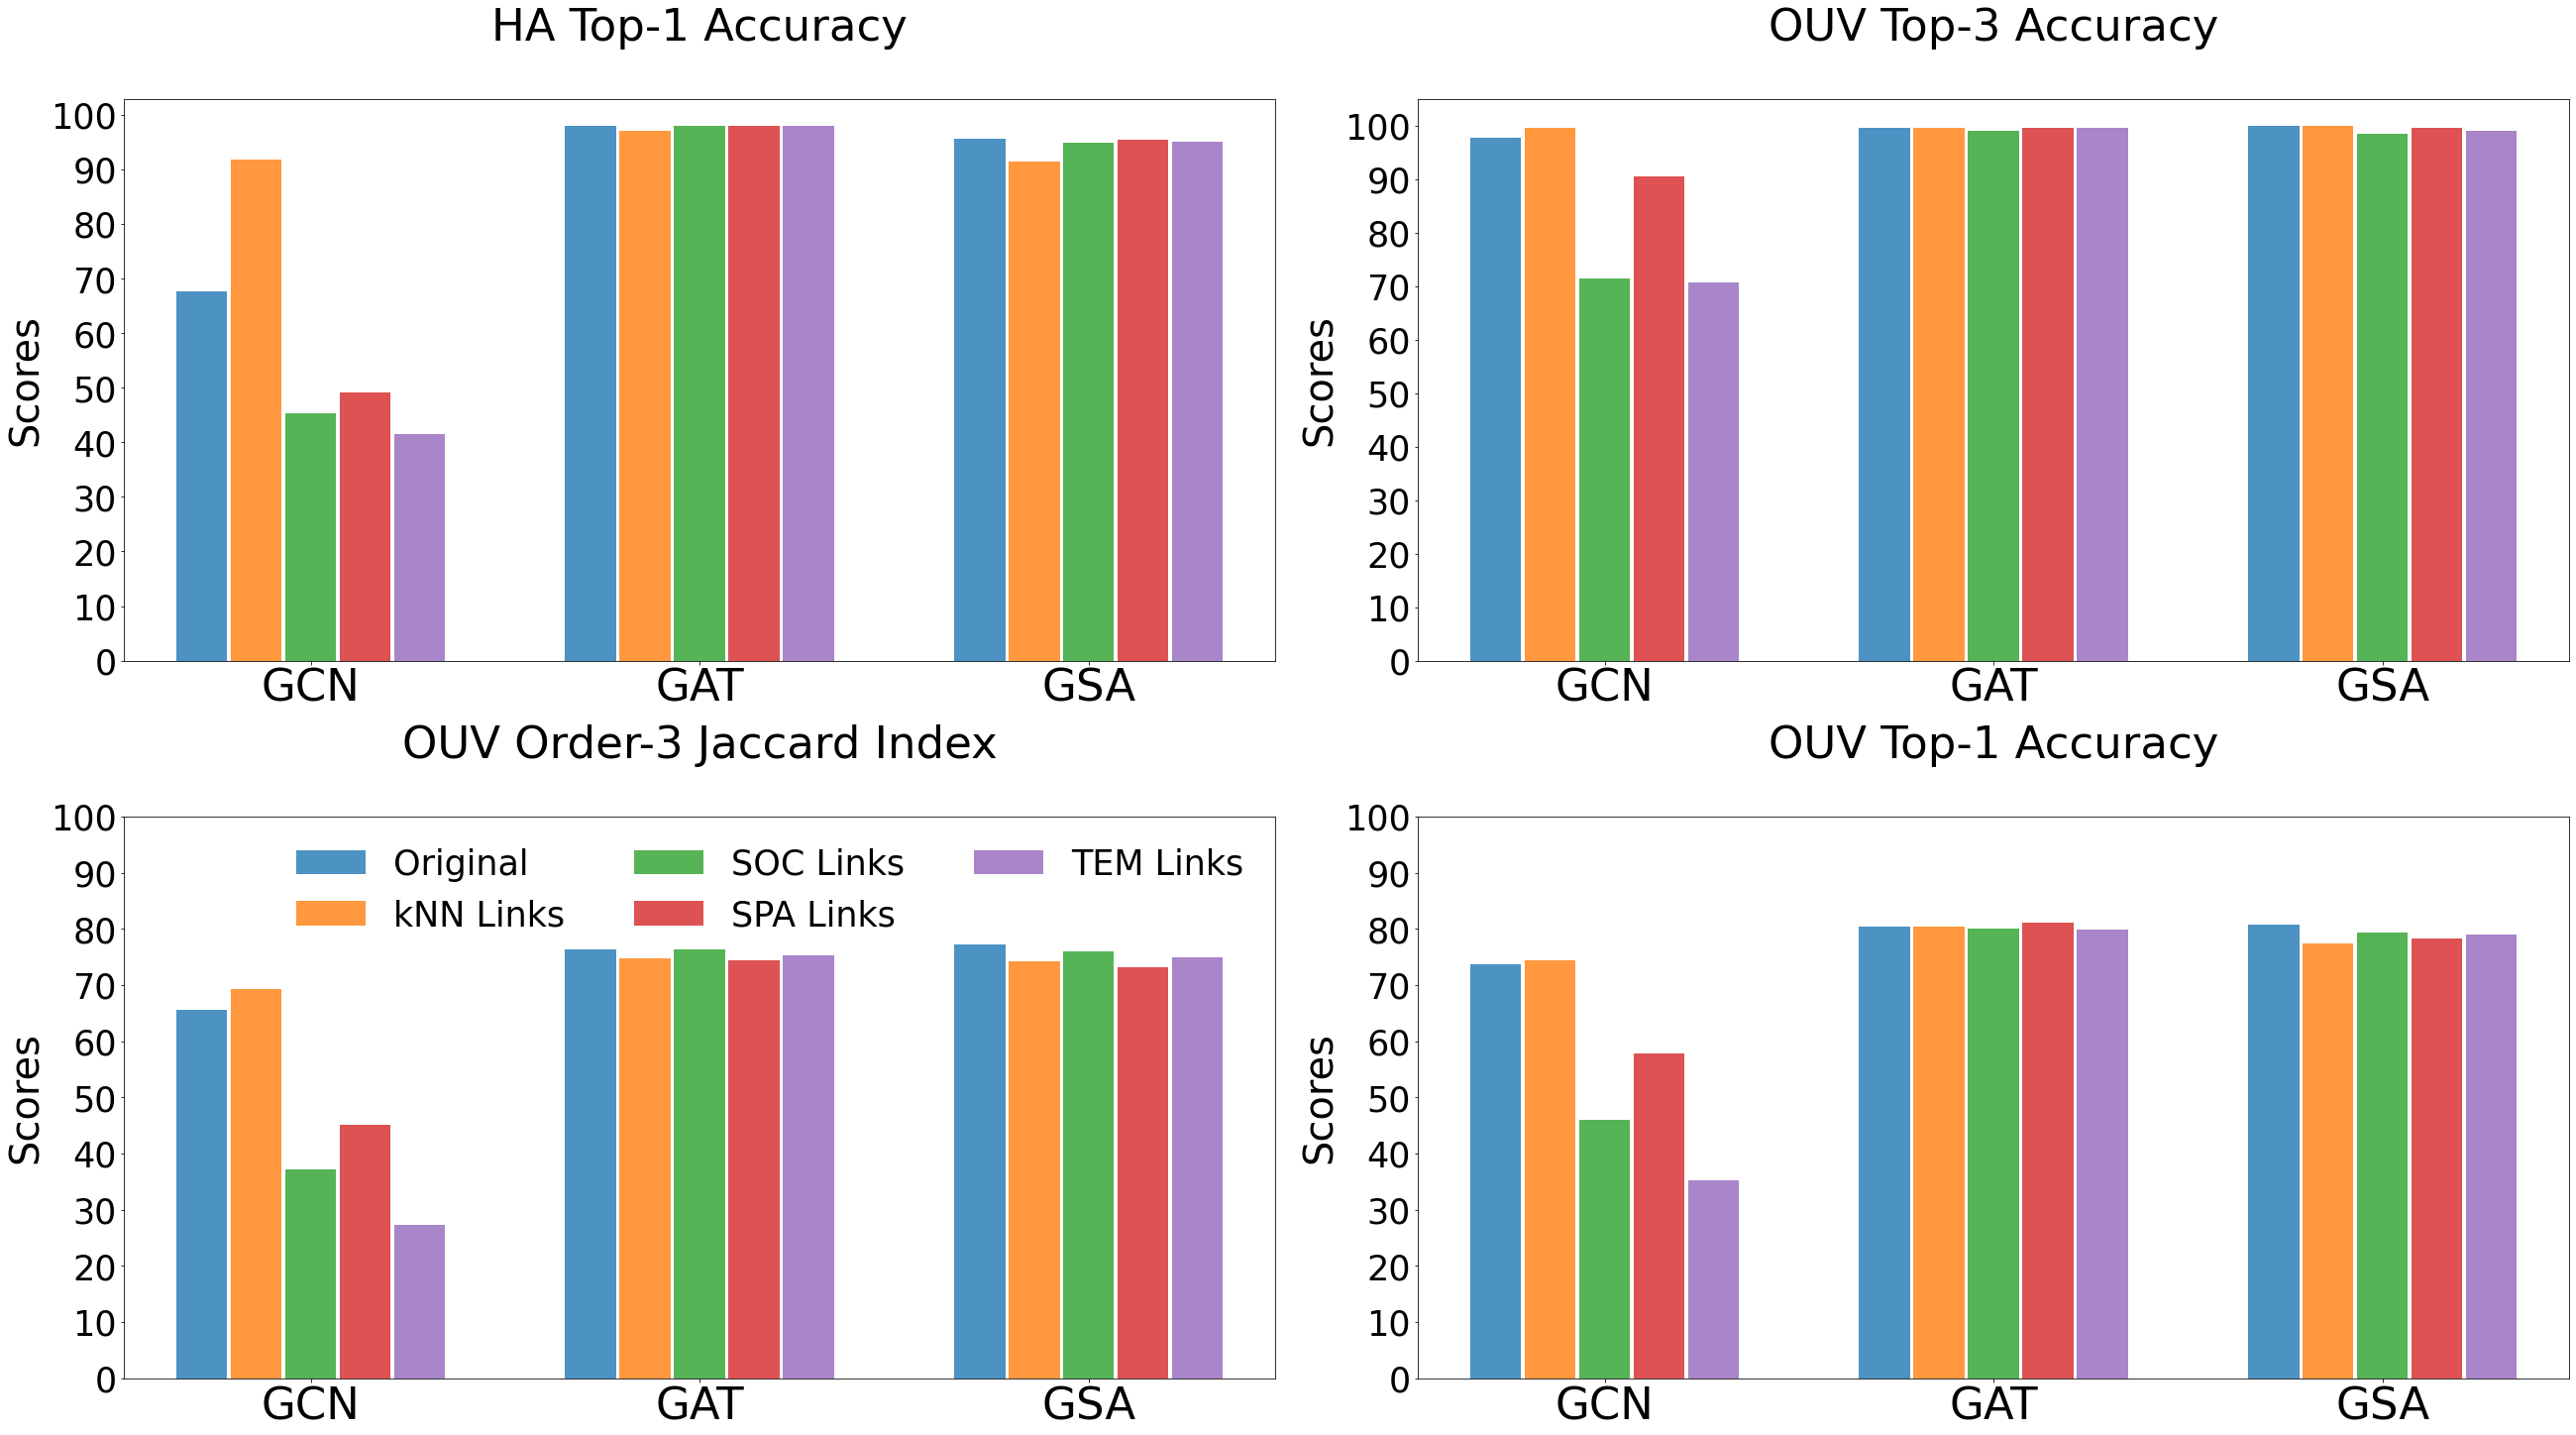

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (36,20), constrained_layout=True,
                       sharex=False, sharey=False)
for j in range(len(metric_names)):
    metric_name = metric_names[j]
    x = np.arange(len(comp))
    rects1 = axs[int(j/2), j%2].bar(x - width*4/5, comp_n['Original'][j], width*3/8, label='Original',alpha=0.8)
    rects2 = axs[int(j/2), j%2].bar(x - width*2/5, comp_n['kNN Links'][j], width*3/8, label='kNN Links',alpha=0.8)
    rects3 = axs[int(j/2), j%2].bar(x, comp_n['SOC Links'][j], width*3/8, label='SOC Links',alpha=0.8)
    rects4 = axs[int(j/2), j%2].bar(x + width*2/5, comp_n['SPA Links'][j], width*3/8, label='SPA Links',alpha=0.8)
    rects5 = axs[int(j/2), j%2].bar(x + width*4/5, comp_n['TEM Links'][j], width*3/8, label='TEM Links',alpha=0.8)
    
    axs[int(j/2), j%2].set_yticks(np.arange(0,101, 10), fontsize=35)
    axs[int(j/2), j%2].set_yticklabels(np.arange(0,101, 10), fontsize=35)
    axs[int(j/2), j%2].set_ylabel('Scores',size=40)
    
    axs[int(j/2), j%2].set_xticks(x, model_names[1:4], size=45)
    axs[int(j/2), j%2].set_title(metric_name+'\n', size=45)
    
    if j==2:
        axs[int(j/2), j%2].legend(fontsize=35,frameon=False, ncol=3)

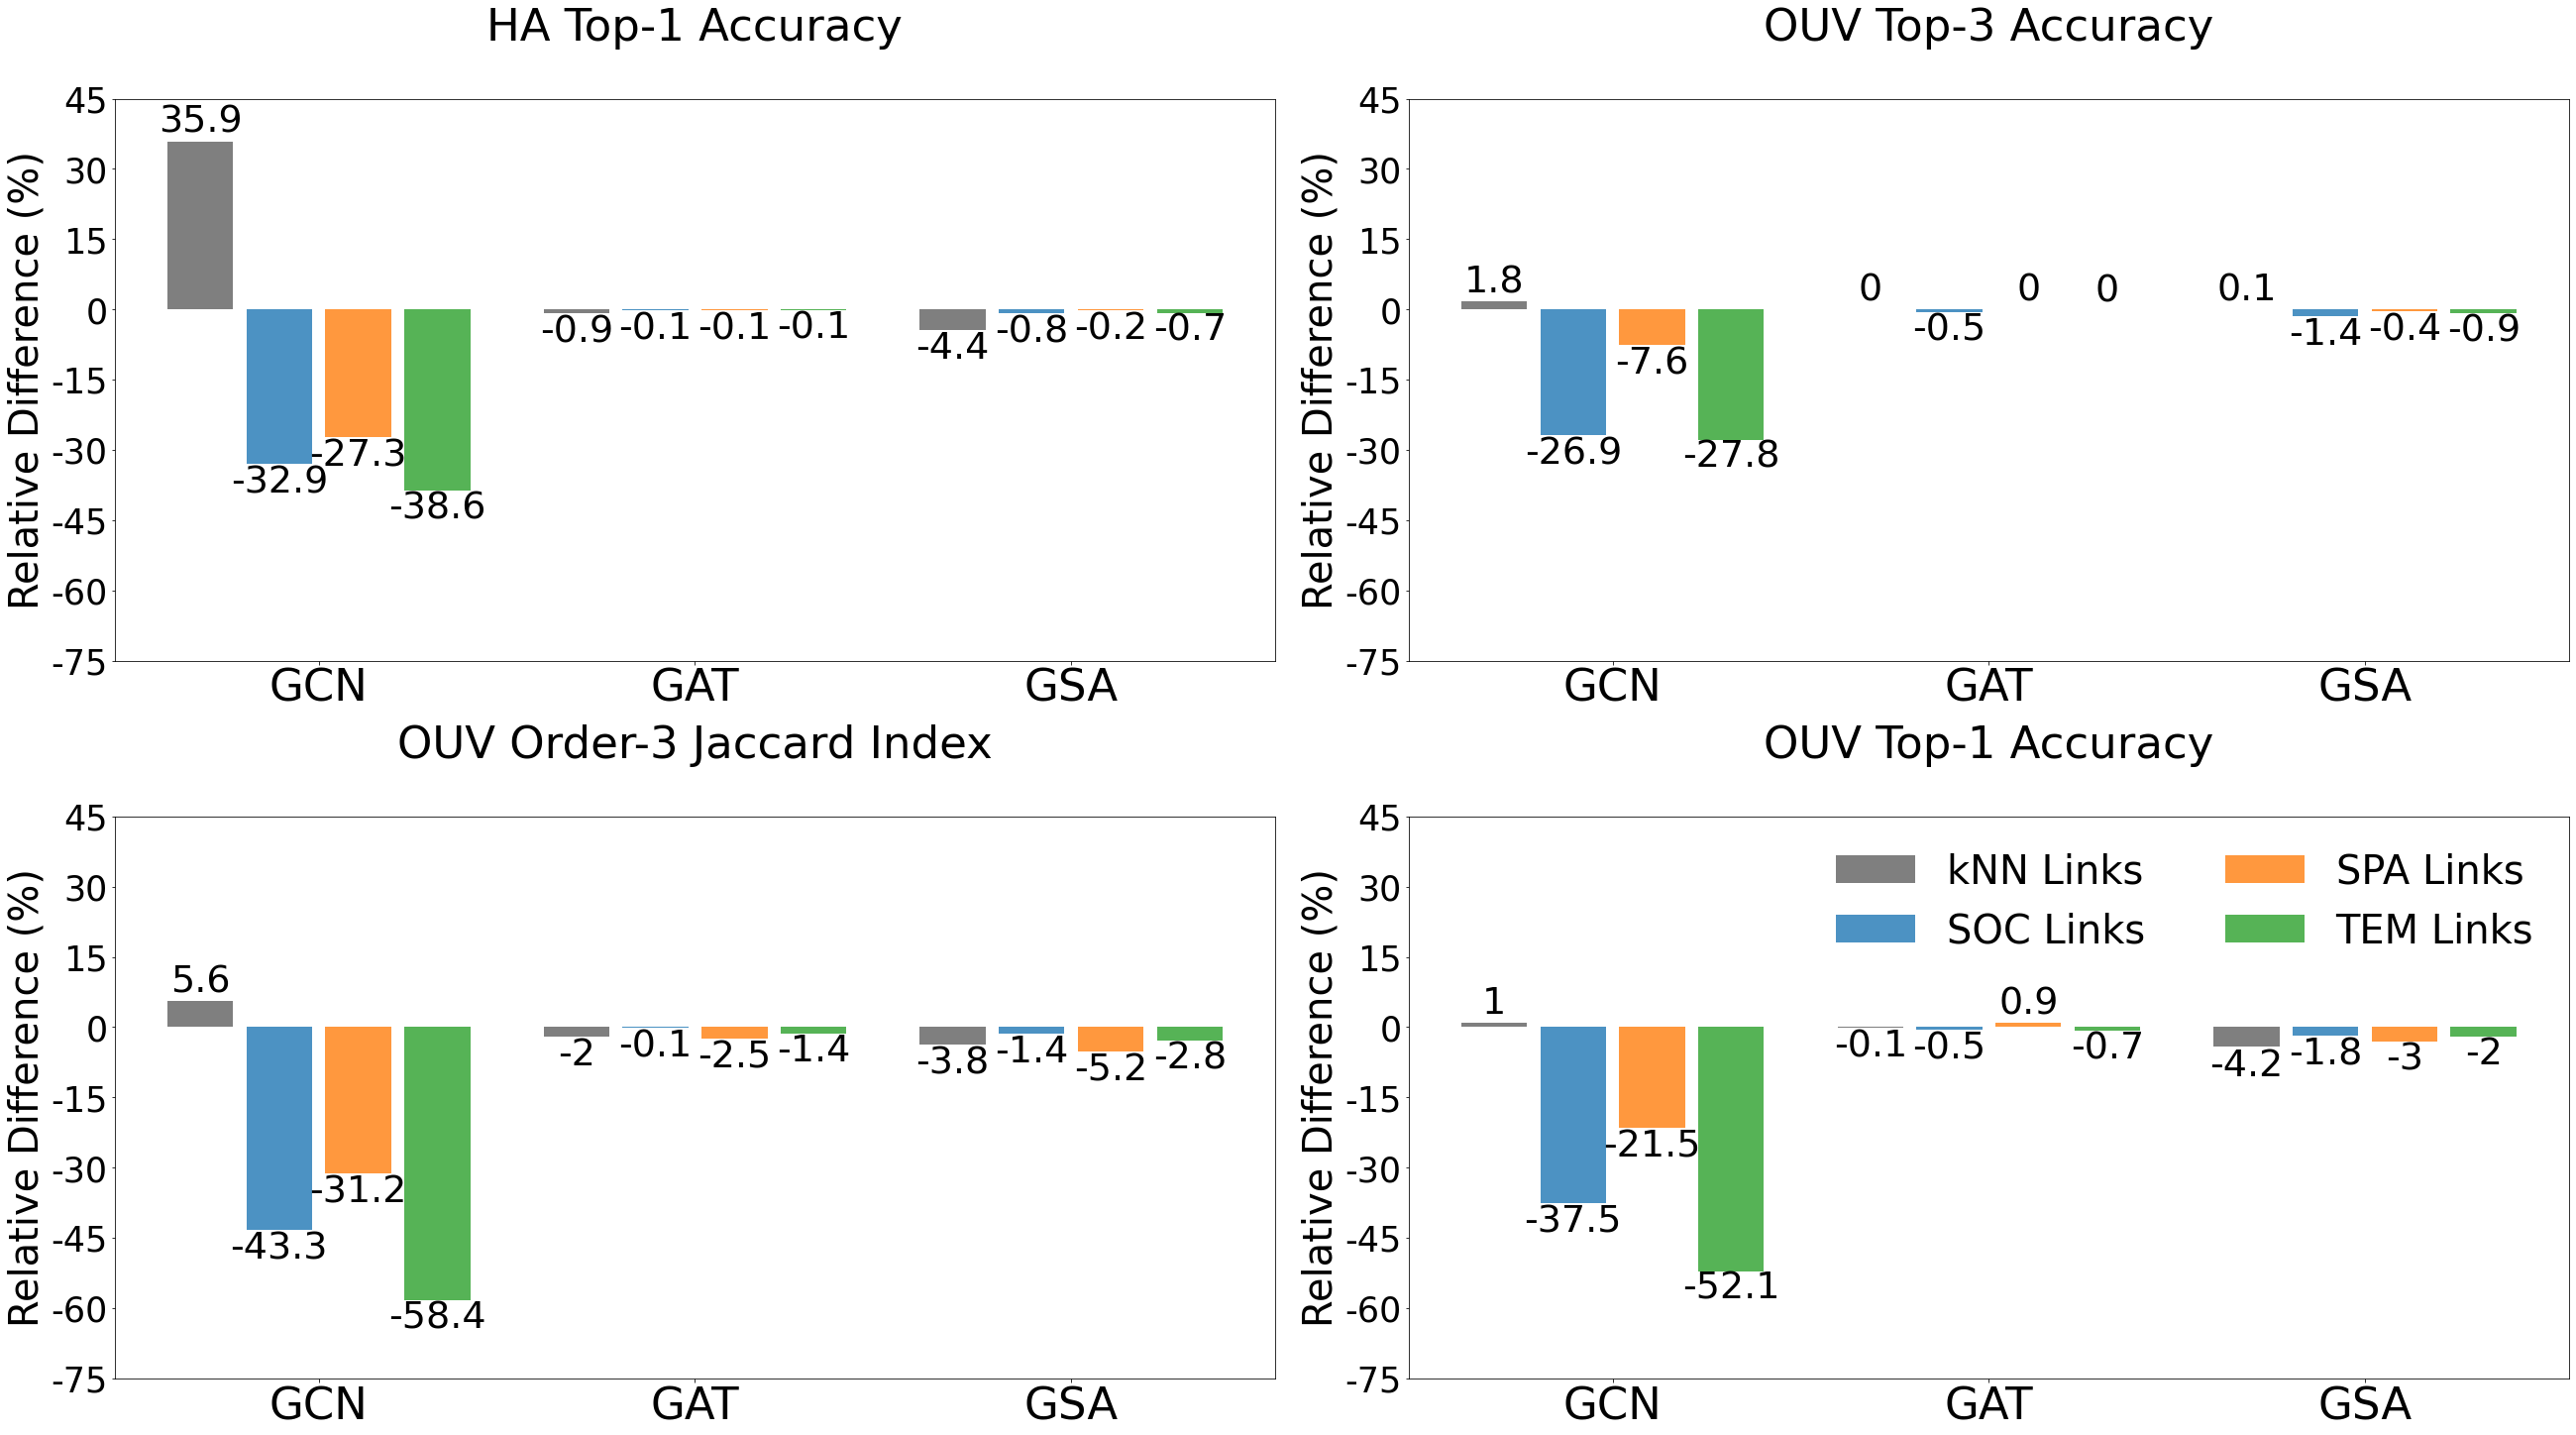

In [85]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (36,20), constrained_layout=True,
                       sharex=False, sharey=False)
for j in range(len(metric_names)):
    metric_name = metric_names[j]
    x = np.arange(len(comp))
    rects2 = axs[int(j/2), j%2].bar(x - width*4.5/5, 100*((comp_n['kNN Links'][j]-comp_n['Original'][j])/comp_n['Original'][j]).round(3), 
                                    width*4/8, label='kNN Links',alpha=0.5, color='k')
    rects3 = axs[int(j/2), j%2].bar(x - width*1.5/5, 100*((comp_n['SOC Links'][j]-comp_n['Original'][j])/comp_n['Original'][j]).round(3), width*4/8, label='SOC Links',alpha=0.8)
    rects4 = axs[int(j/2), j%2].bar(x + width*1.5/5, 100*((comp_n['SPA Links'][j]-comp_n['Original'][j])/comp_n['Original'][j]).round(3), width*4/8, label='SPA Links',alpha=0.8)
    rects5 = axs[int(j/2), j%2].bar(x + width*4.5/5, 100*((comp_n['TEM Links'][j]-comp_n['Original'][j])/comp_n['Original'][j]).round(3), width*4/8, label='TEM Links',alpha=0.8)
    
    axs[int(j/2), j%2].set_yticks(np.arange(-75,56, 15).round(2), fontsize=35)
    axs[int(j/2), j%2].set_yticklabels(np.arange(-75,56, 15).round(2), fontsize=35)
    axs[int(j/2), j%2].set_ylabel('Relative Difference (%)',size=40)
    
    axs[int(j/2), j%2].bar_label(rects2, size=38, padding=1)
    axs[int(j/2), j%2].bar_label(rects3, size=38, padding=1)
    axs[int(j/2), j%2].bar_label(rects4, size=38, padding=1)
    axs[int(j/2), j%2].bar_label(rects5, size=38)
    
    axs[int(j/2), j%2].set_xticks(x, model_names[1:4], size=45)
    axs[int(j/2), j%2].set_title(metric_name+'\n', size=45)
    
    if j==3:
        axs[int(j/2), j%2].legend(fontsize=40,frameon=False, ncol=2)

In [52]:
ndics = [metrics_o, SOC, SPA, TEM, nSOC, nSPA, nTEM]
ndic_names = ['Original', 'SOC Links', 'SPA Links', 'TEM Links', 'NO SOC Links', 'NO SPA Links', 'NO TEM Links']

In [53]:
ncomp = {}
for model in compare[4:]:
    ncomp[model] = {}
    for d in range(len(ndics)):
        ncomp[model][ndic_names[d]] = ndics[d][model][0][2:]

In [54]:
ncomp_n = {}
for i in ndic_names:
    ncomp_n[i] = np.vstack((pd.DataFrame(ncomp).loc[i])).T

In [55]:
ncomp

{'HeteroGNN': {'Original': array([96.63, 99.11, 77.33, 84.73]),
  'SOC Links': array([62.34, 95.67, 66.72, 71.77]),
  'SPA Links': array([64.13, 82.02, 47.  , 45.37]),
  'TEM Links': array([84.39, 88.67, 55.3 , 54.04]),
  'NO SOC Links': array([91.06, 85.52, 49.55, 49.7 ]),
  'NO SPA Links': array([90.26, 98.87, 68.6 , 74.58]),
  'NO TEM Links': array([72.28, 93.35, 64.49, 73.45])},
 'HGT': {'Original': array([96.95, 98.03, 73.81, 79.31]),
  'SOC Links': array([96.95, 98.03, 73.48, 79.8 ]),
  'SPA Links': array([96.95, 98.03, 73.58, 79.36]),
  'TEM Links': array([96.95, 98.03, 73.48, 79.31]),
  'NO SOC Links': array([96.95, 98.03, 73.74, 79.31]),
  'NO SPA Links': array([96.95, 98.03, 73.73, 79.31]),
  'NO TEM Links': array([96.95, 98.03, 73.48, 79.31])}}

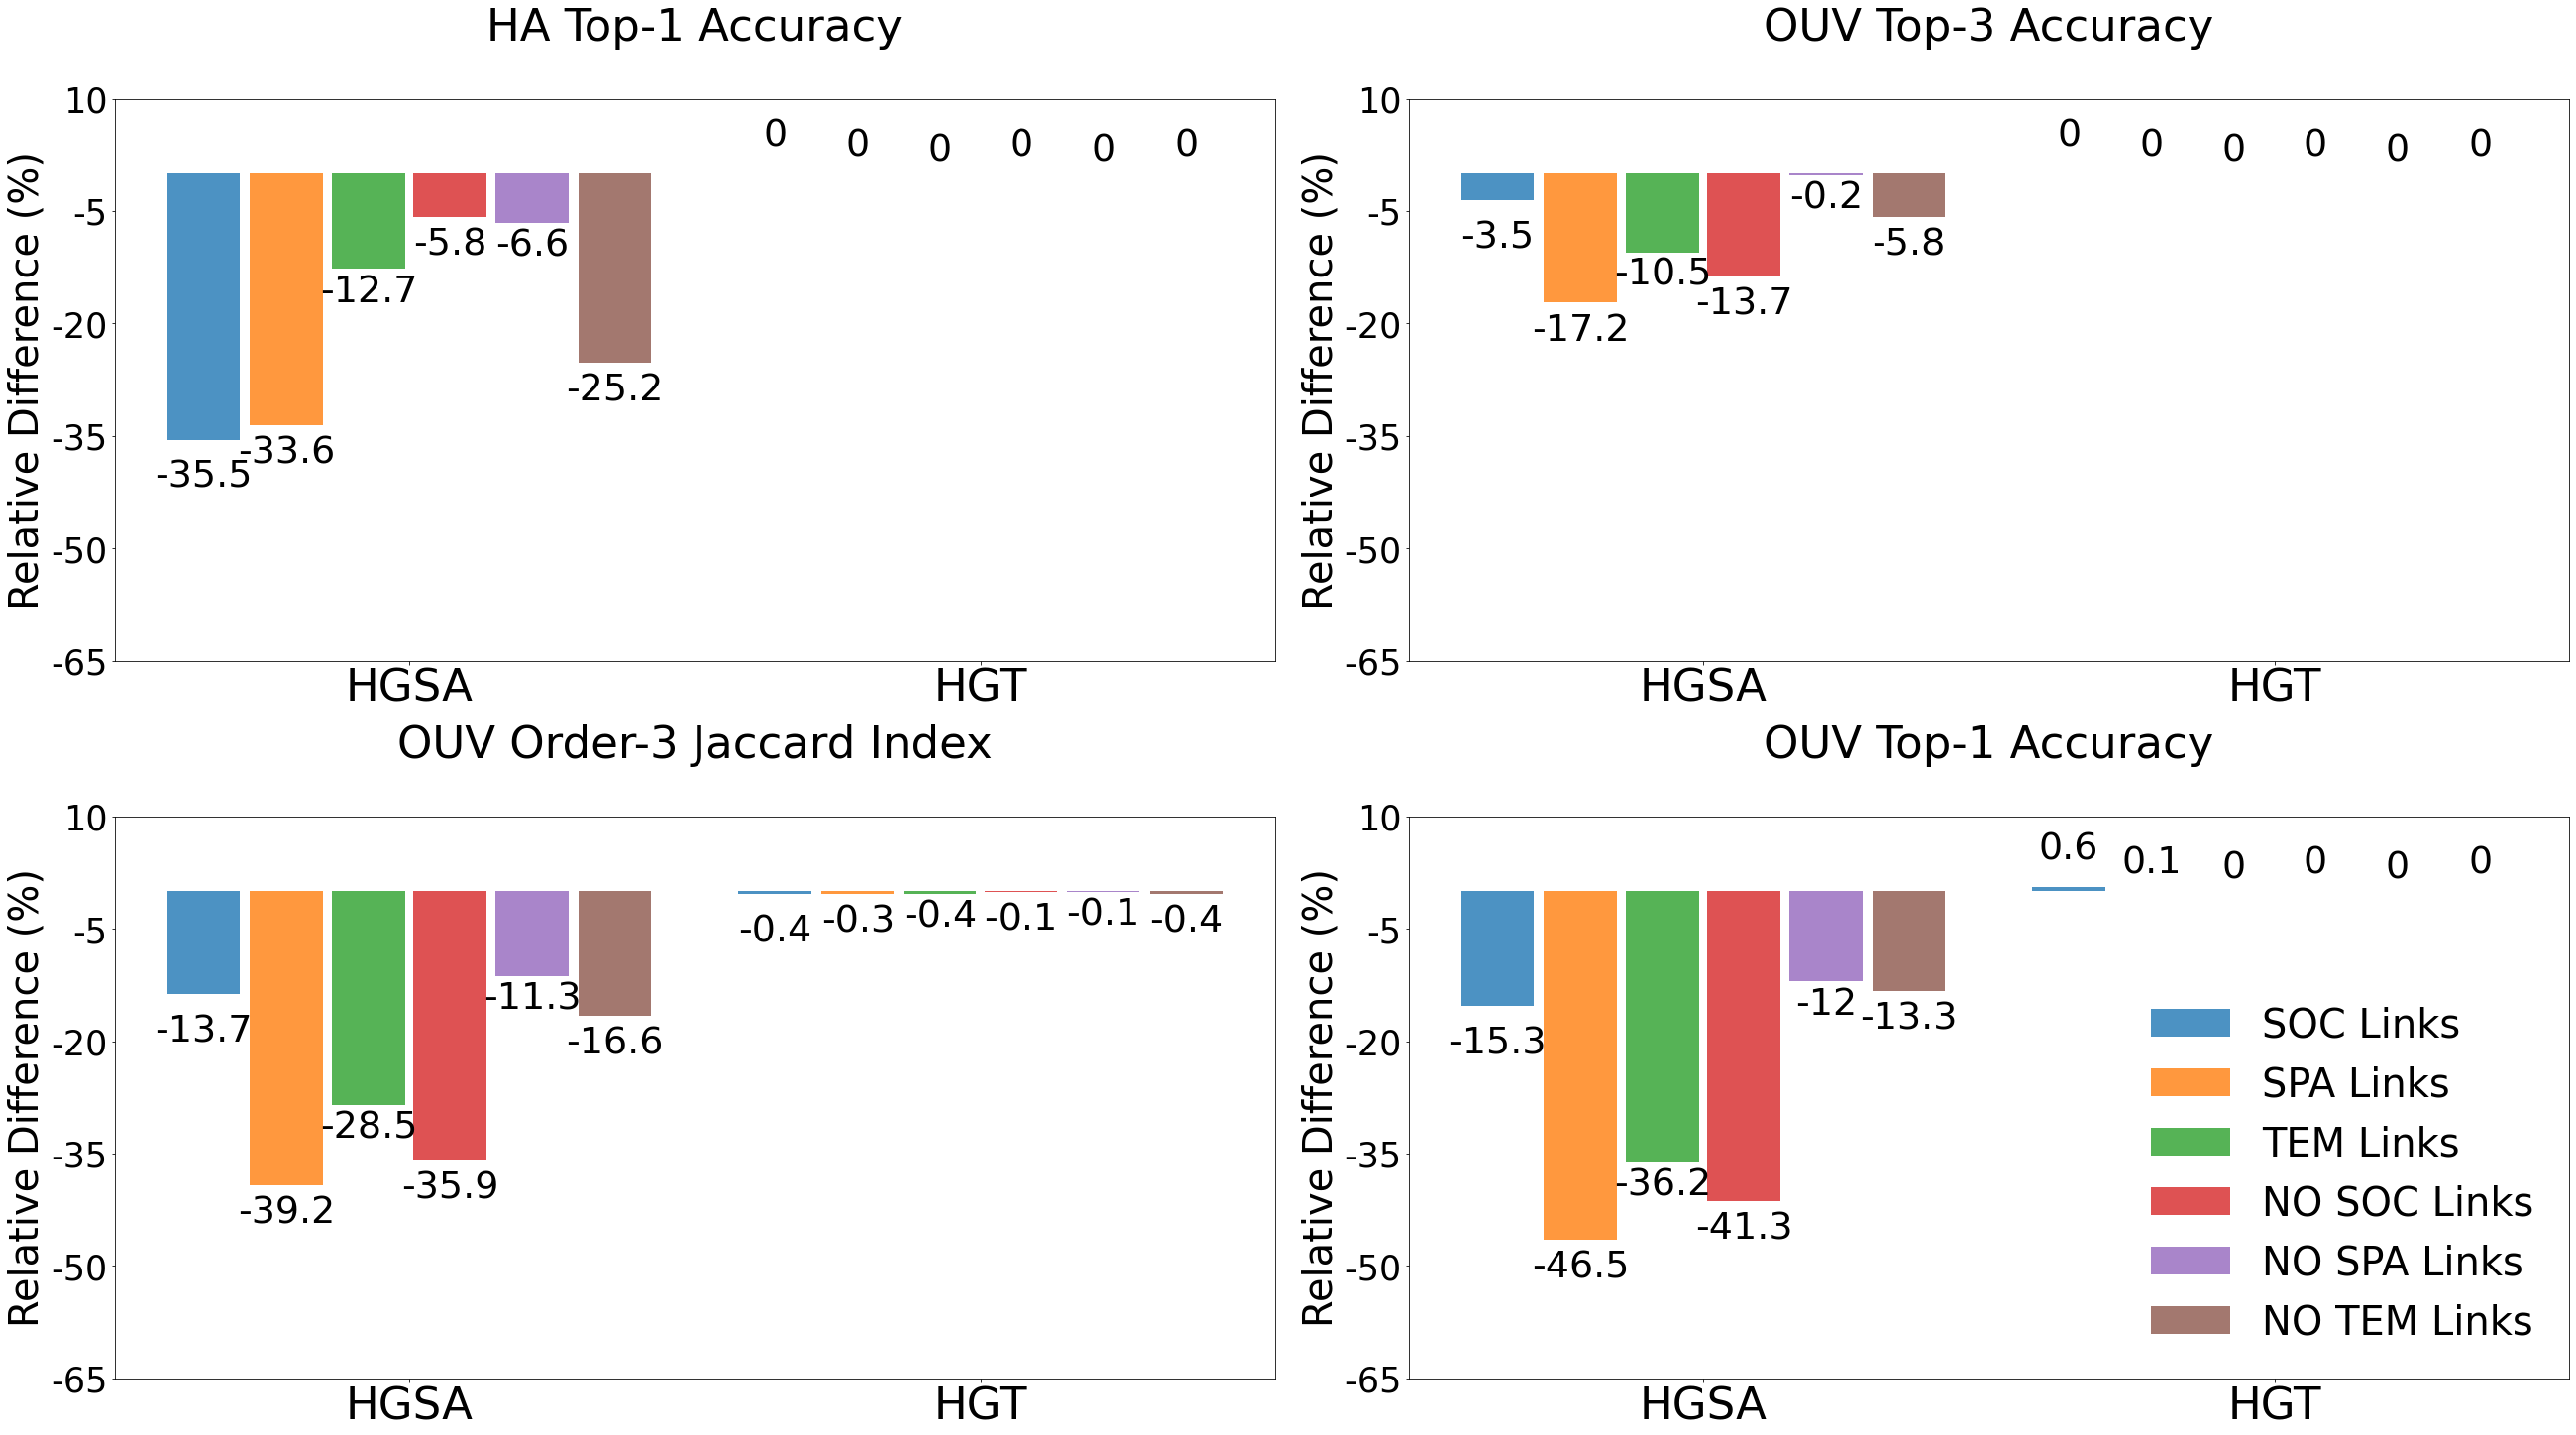

In [110]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (36,20), constrained_layout=True,
                       sharex=False, sharey=False)
for j in range(len(metric_names)):
    metric_name = metric_names[j]
    x = np.arange(len(ncomp))
    rects1 = axs[int(j/2), j%2].bar(x - width*7.2/7, 100*((ncomp_n['SOC Links'][j]-ncomp_n['Original'][j])/ncomp_n['Original'][j]).round(3), width*4/11, label='SOC Links',alpha=0.8)
    rects2 = axs[int(j/2), j%2].bar(x - width*4.3/7, 100*((ncomp_n['SPA Links'][j]-ncomp_n['Original'][j])/ncomp_n['Original'][j]).round(3), width*4/11, label='SPA Links',alpha=0.8)
    rects3 = axs[int(j/2), j%2].bar(x - width*1.42/7, 100*((ncomp_n['TEM Links'][j]-ncomp_n['Original'][j])/ncomp_n['Original'][j]).round(3), width*4/11, label='TEM Links',alpha=0.8)
    rects4 = axs[int(j/2), j%2].bar(x + width*1.42/7, 100*((ncomp_n['NO SOC Links'][j]-ncomp_n['Original'][j])/ncomp_n['Original'][j]).round(3), width*4/11, label='NO SOC Links',alpha=0.8)
    rects5 = axs[int(j/2), j%2].bar(x + width*4.3/7, 100*((ncomp_n['NO SPA Links'][j]-ncomp_n['Original'][j])/ncomp_n['Original'][j]).round(3), width*4/11, label='NO SPA Links',alpha=0.8)
    rects6 = axs[int(j/2), j%2].bar(x + width*7.2/7, 100*((ncomp_n['NO TEM Links'][j]-ncomp_n['Original'][j])/ncomp_n['Original'][j]).round(3), width*4/11, label='NO TEM Links',alpha=0.8)
    
    axs[int(j/2), j%2].set_yticks(np.arange(-65,15, 15).round(2), fontsize=35)
    axs[int(j/2), j%2].set_yticklabels(np.arange(-65,15, 15).round(2), fontsize=35)
    axs[int(j/2), j%2].set_ylabel('Relative Difference (%)',size=40)
    
    axs[int(j/2), j%2].bar_label(rects1, size=38,padding=20)
    axs[int(j/2), j%2].bar_label(rects2, size=38,padding=10)
    axs[int(j/2), j%2].bar_label(rects3, size=38,padding=5)
    axs[int(j/2), j%2].bar_label(rects4, size=38,padding=10)
    axs[int(j/2), j%2].bar_label(rects5, size=38,padding=5)
    axs[int(j/2), j%2].bar_label(rects6, size=38,padding=10)
    
    axs[int(j/2), j%2].set_xticks(x, model_names[4:], size=45)
    axs[int(j/2), j%2].set_title(metric_name+'\n', size=45)
    
    if j==3:
        axs[int(j/2), j%2].legend(fontsize=40,frameon=False, ncol=1)